Error cuadrático medio (RMSE) en entrenamiento: 2.0659354692538248
Error cuadrático medio (RMSE) en prueba: 5.576079959329017
R² en prueba: 0.9557242182800559


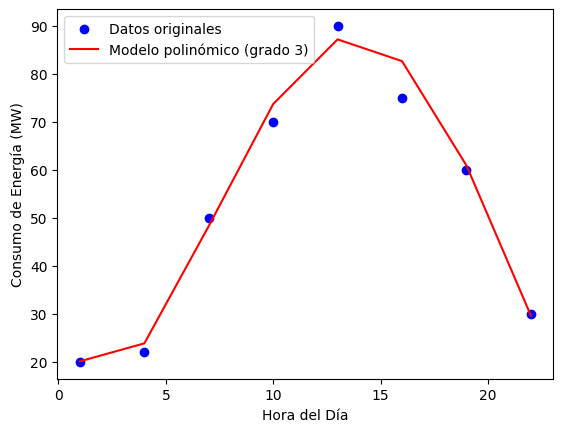

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dataset: Horas y consumo de energía (ficticio)
horas = np.array([1, 4, 7, 10, 13, 16, 19, 22]).reshape(-1, 1)
consumo = np.array([20, 22, 50, 70, 90, 75, 60, 30])

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(horas, consumo, test_size=0.2, random_state=42)

# Probemos con varios grados de polinomio
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creamos el modelo de regresión
modelo = LinearRegression()
modelo.fit(X_train_poly, y_train)

# Hacemos predicciones
y_pred_train = modelo.predict(X_train_poly)
y_pred_test = modelo.predict(X_test_poly)

# Evaluamos el modelo
print("Error cuadrático medio (RMSE) en entrenamiento:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Error cuadrático medio (RMSE) en prueba:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R² en prueba:", r2_score(y_test, y_pred_test))

# Visualizamos el ajuste
plt.scatter(horas, consumo, color='blue', label='Datos originales')
plt.plot(horas, modelo.predict(poly.fit_transform(horas)), color='red', label='Modelo polinómico (grado 3)')
plt.xlabel('Hora del Día')
plt.ylabel('Consumo de Energía (MW)')
plt.legend()
plt.show()